# Caracterización de la radiación cósmica

En este Notebook trataremos de demostrar que la tasa de radiación cósmica sigue una distribución de Poisson, realizando un ajuste a los datos tomados en el laboratorio y un test de $\chi^{2}$

Cargamos los módulos necesarios:

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.optimize as so
import scipy.special as se #para el factorial
import pandas as pd
from decimal import * #para las cifras significativas
from scipy import stats #para el test de chi
from tabulate import tabulate

Leemos los datos desde un archivo .txt

In [2]:
def leerArchivo(archivo):
    datos = open(archivo, 'r')
    tiempos = []
    numeros = []
    contador = 0
    for linea in datos: #recorremos cada línea del archivo
        if len(linea) == 1: #len cuenta los bytes de cada linea: si tiene 1 byte es porque cuenta el salto de linea como \n
            continue
        else: #en otro caso, será algún dato de interés
            numero_elementos = linea.split() #guardamos los elementos de la línea
            if len(numero_elementos) == 1: #si hay un solo elemento, será el tiempo unix
                tiempos.append(numero_elementos)
                contador += 1
            else: #en otro caso, será alguno de los otros datos
                numeros.append(numero_elementos)
    #el resultado de este bucle es una lista de listas, lo cual no nos interesa porque queremos trabajar con elementos que sean números
    tamaño = len(tiempos)
    tiempos_unix = [] #almacenamos aquí el tiempo unix
    for i in range(tamaño):
        tiempos_unix.append(int(tiempos[i][0]))
    return tiempos_unix

Una vez obtenemos el array con los tiempos a los que se detectaron las cuentas, debemos dividir el tiempo de medida en intervalos fijos (1s, 5s, 10s, ...) y ver cuántas cuentas caen en cada uno.

In [3]:
tiempos_micros = leerArchivo('coincidenciasABCD.txt')
t0 = tiempos_micros[0] #establecemos el primer elemento como 0
for i in range(len(tiempos_micros)):
    tiempos_micros[i] = tiempos_micros[i] - t0
    i += 1
tiempos = np.multiply(tiempos_micros, 10**(-6)) #pasamos a segundos
print('número de disparos =', len(tiempos)) #para verificar que configuramos 1000 disparos

número de disparos = 1000


## 1ª parte: número de cuentas a tiempo fijo

En esta parte estudiemos cómo se distribuyen los disparos en intervalos temporales fijos.

In [4]:
def contaje(vector):
    deltat1 = 1 #(s) establecemos nuestro intervalo temporal
    deltat2ymedio = 2.5
    deltat5 = 5
    deltat10 = 10
    deltat05 = 0.5
    deltat15 = 12
    ##############################################
    divisiones1 = (vector[-1] - vector[0])/deltat1 #no es necesario restar vector[0] porque ya le hemos restado a todos los elementos el t0
    cuentas1 = np.zeros(int(divisiones1)+1) #donde almacenamos las cuentas por intervalo
    k1 = 0
    for j in range(len(vector)): #recorremos todo el vector de tiempos
        while vector[j] >= (k1+1)*deltat1: # mientras que la componente del vector sea mayor que el intervalo dt, sigue contando intervalos. Cuando no se cumpla, rompe el while y vuelve al for
            k1 += 1       #nuevo intervalo
        cuentas1[k1] += 1 #almacena las cuentas en la componente del vector de zeros que le corresponda
    ##############################################
    divisiones2ymedio = (vector[-1] - vector[0])/deltat2ymedio
    cuentas2ymedio = np.zeros(int(divisiones2ymedio)+1)
    k2ymedio = 0
    for l in range(len(vector)):
        while vector[l] >= (k2ymedio+1)*deltat2ymedio:
            k2ymedio += 1
        cuentas2ymedio[k2ymedio] += 1
    #############################################
    divisiones5 = (vector[-1] - vector[0])/deltat5
    cuentas5 = np.zeros(int(divisiones5)+1)
    k5 = 0
    for l in range(len(vector)):
        while vector[l] >= (k5+1)*deltat5:
            k5 += 1
        cuentas5[k5] += 1
    #############################################    
    divisiones10 = (vector[-1] - vector[0])/deltat10
    cuentas10 = np.zeros(int(divisiones10)+1)
    k10 = 0
    for l in range(len(vector)):
        while vector[l] >= (k10+1)*deltat10:
            k10 += 1
        cuentas10[k10] += 1
    #############################################
    divisiones05 = (vector[-1] - vector[0])/deltat05
    cuentas05 = np.zeros(int(divisiones05)+1)
    k05 = 0
    for l in range(len(vector)):
        while vector[l] >= (k05+1)*deltat05:
            k05 += 1
        cuentas05[k05] += 1
    #############################################
    divisiones15 = (vector[-1] - vector[0])/deltat15
    cuentas15 = np.zeros(int(divisiones15)+1)
    k15 = 0
    for l in range(len(vector)):
        while vector[l] >= (k15+1)*deltat15:
            k15 += 1
        cuentas15[k15] += 1
    #############################################
    return cuentas1, cuentas2ymedio, cuentas5, cuentas10, cuentas05, cuentas15

In [5]:
cuentas_1s = contaje(tiempos)[0]
cuentas_2symedio = contaje(tiempos)[1]
cuentas_5s = contaje(tiempos)[2]
cuentas_10s = contaje(tiempos)[3]
cuentas_05s = contaje(tiempos)[4]
cuentas_15s = contaje(tiempos)[5]

Representamos la frecuencia de cuentas en un histograma.

In [6]:
cuentas = cuentas_1s

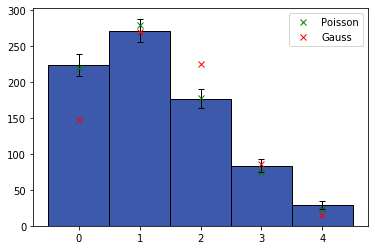

grados libertad =  4
lambda (media) =  1.272264631043257
u(l)=  2.2558941739747076
╒═══════════╤═══════════╤══════════════╕
│           │   Poisson │        Gauss │
╞═══════════╪═══════════╪══════════════╡
│ chi2      │  2.27053  │ 63.9777      │
├───────────┼───────────┼──────────────┤
│ percentil │  0.686139 │  4.22463e-13 │
╘═══════════╧═══════════╧══════════════╛


In [9]:
#representamos el histograma del número de cuentas
#n_bins = int(max(cuentas)+1)
n_bins = 5
n, xbins, patches = plt.hist(cuentas, bins=n_bins, color='#3D59AB', edgecolor='black')

#para centrar las barras
ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
ticklabels = [i for i in range(n_bins)]
plt.xticks(ticks, ticklabels)

#configuramos 2 nuevas variables: los valores repetidos de números de cuentas (labels) y su número de repeticiones (counts)
labels, counts = np.unique(cuentas, return_counts=True)

#incertezas nas contas
uy = np.sqrt(n)

############################################################################################################################

#Poisson

#la media de la distribución de Poisson es lambda
l = sum(labels*counts)/sum(counts)
#la desviación de la media para esta distribución es sqrt(lambda)
desv_l = np.sqrt(l)
deltat = 0.5
u_l = desv_l/deltat
#definimos los grados de libertad
grad_lib = sum(labels) -1 -1
    
#definimos la función de distribución con nuestros parámetros
def poisson(x, l):
    return len(cuentas)*((l**x)/se.factorial(x))*np.exp(-l)

y_p = poisson(xbins[:-1], l)

#grados de libertad en el test de una distribución de probabilidad = k-r-1
# k = número de clases ; r = 1 pq estamos ajustando a un parámetro ; -1 pq existe una ligadura sum(frec) = N
n_grados_libertad = len(xbins[:-1]) - 1

#test de chi^2
"""chisq_p, p_p = stats.chisquare(counts, poisson(labels, l))"""
#chi_red_p = chisq_p/n_grados_libertad
chisq_p, p_p = stats.chisquare(n, poisson(xbins[:-1], l))

############################################################################################################################

#Gauss

#gauss como límite de poisson sigma == raiz(media)
def gauss(x, l):
    return len(cuentas)*np.exp(-(x-l)**2/(2*l))/(np.sqrt(2*np.pi*l))

y_g = gauss(xbins[:-1], l)

#test de chi^2
"""chisq_g, p_g = stats.chisquare(counts, gauss(labels, l))
chi_red_g = chisq_g/n_grados_libertad"""
chisq_g, p_g = stats.chisquare(n, gauss(xbins[:-1], l))

############################################################################################################################

#Representación gráfica

plt.plot(ticks, y_p, 'gx', label='Poisson') #como eje X metemos ticks porque hemos tenido que ajustarlos antes al histograma, de lo contrario no quedan centrados
plt.plot(ticks, y_g, 'rx', label='Gauss')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.errorbar(ticks, n, xerr=None, yerr=uy, fmt=',', color='k', ecolor='k', elinewidth=1, capsize=3)
plt.legend(loc='upper right', fancybox='True')
#plt.savefig('cuentas_12s.pdf')
plt.show()

#Mostramos los resultados
resultados = [['chi2', chisq_p , chisq_g],
['percentil', p_p, p_g]]

print('grados libertad = ', n_grados_libertad)
print('lambda (media) = ', l)
print('u(l)= ', u_l)

print (tabulate(resultados, headers=["", "Poisson", "Gauss"], tablefmt='fancy_grid'))

In [89]:
len(counts)

10

In [85]:
n

array([11., 49., 63., 68., 56., 33., 21.,  8.,  5.,  0.,  1.])

## 2ª parte: tiempo entre disparos

Trabajamos ahora en un análisis alternativo: estudiemos cómo se distribuyen los intervalos temporales entre disparos consecutivos.

In [584]:
def dif_tiempos(vector):
    diferencia = np.zeros([len(vector)-1])
    for i in range(len(vector)-1):
        diferencia[i] = vector[i+1]-vector[i]
        i += 1
    return diferencia

intervalos_temporales = dif_tiempos(tiempos)

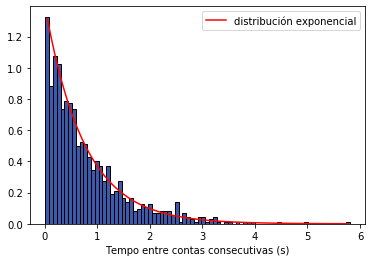

X^2 = 1.0615863436587423
p = 1.0
media =  0.7488042231731475
k =  1.335462553566245
graos de liberdade =  79


In [587]:
#n_bins = len(intervalos_temporales)+1
n_bins = 80
frec, xbins, patches = plt.hist(intervalos_temporales, histtype='bar', color='#3D59AB', edgecolor='black', bins=n_bins, density='True') #density='norm' normaliza la distribución

#return de plt.hist: n -> the values of the histogram bins ; bins -> the edges of the bins

labels_e, counts_e = np.unique(intervalos_temporales, return_counts=True)

#para centrar las barras
ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
ticklabels = [i for i in range(n_bins)]
#plt.xticks(ticks, ticklabels)

#tanto la media como la desviación típica de la distribución exponencial es 1/k 
media = sum(xbins[:-1]*frec)/sum(frec)
k = 1/media

#error y
errory = np.sqrt(frec)

def exponencial(x, k):
    return k*np.exp(-k*x) # x > 0

k0_test = 2.5
ptest = [k0_test]
sol, cov = so.curve_fit(exponencial, xbins[:-1], frec, p0=ptest)
k_test = sol[0]
y_test = exponencial(xbins[:-1], k_test)
#plt.plot(ticks, y_test, 'b.')
                                               
y_e = exponencial(xbins[:-1], k)

plt.plot(ticks, y_e, 'r', label='distribución exponencial')

plt.legend(loc='best')
plt.xlabel('Tempo entre contas consecutivas (s)')
plt.title('')
#plt.savefig('expABCD.pdf')

plt.show()

#test de chi^2
n_parametros = 0
n_grados_libertad = len(xbins[:-1]) - 1
chisq_e, p_e = stats.chisquare(frec, exponencial(xbins[:-1], k))
#chisq_e, p_e = stats.chisquare(labels_e, exponencial(counts_e, k), ddof = 1) #usamos los valores del histograma ?????????
print('X^2 =', chisq_e)
print('p =', p_e)
print('media = ', media)
print('k = ', k)
print('graos de liberdade = ', n_grados_libertad)

In [226]:
media = sum(xbins[:-1]*frec)/sum(frec)
media

0.7561406584183937

In [227]:
k

1.3225052625680553

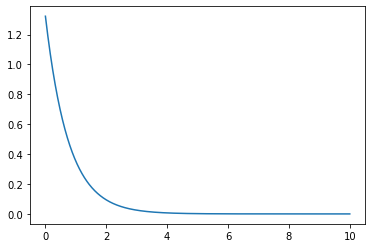

In [231]:
xaux = np.linspace(0,10,1000)
plt.plot(xaux, 1.3225*np.exp(-1.3225*xaux))

In [ ]:
"""
def chi2_poisson(xi, frec):
    #calculamos la media de poisson, lambda
    l = sum(xi*frec)/sum(frec)
    #definimos la distribución de probabilidad
    p = []
    for i in range(len(frec)):
        p.append((l)**i*np.exp(-l)/se.factorial(i))
    #definimos las frecuencias esperadas
    frec_esp= []
    for i in range(len(p)):
        frec_esp.append(p[i]*100)
    #definimos el chi2
    chi2 = 0
    for i in range(len(frec_esp)):
        chi2 += ((frec[i] - frec_esp[i])**2/frec_esp[i])
    return chi2

chi2 = chi2_poisson(labels, counts)
print(chi2)
"""

In [ ]:
############################################################################################################################
# Representación gráfica simultánea

"""labels1, counts1 = np.unique(cuentas_1s, return_counts=True)
labels25, counts25 = np.unique(cuentas_2symedio, return_counts=True)
labels5, counts5 = np.unique(cuentas_5s, return_counts=True)
labels10, counts10 = np.unique(cuentas_10s, return_counts=True)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# sharey='row' para compartir el eje Y
# sharex='col'

ax1.bar(labels1, counts1, align='center', color='#3D59AB', edgecolor='k')
ax2.bar(labels25, counts25, align='center', color='#3D59AB', edgecolor='k')
ax3.bar(labels5, counts5, align='center', color='#3D59AB', edgecolor='k')
ax4.bar(labels10, counts10, align='center', color='#3D59AB', edgecolor='k')


plt.tight_layout()
plt.show()"""
############################################################################################################################